# Финальный проект: вариант 3. Дейтинговое приложение.

Вы работаете в крупном дейтинговом приложении. Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

#### Проверьте:

* Был ли эксперимент успешен в целом.
* Проанализируйте, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.

*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

  

### Данные

Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:

**users_*.csv – информация о пользователях:

* uid – идентификатор пользователя

* age – возраст

* attraction_coeff – коэффициент привлекательности (от 0 до 1000, (лайки/просмотры)*1000)
* coins – число монеток (внутренняя валюта)

* country – страна  

* visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)

* gender – пол

* age_filter_start  – фильтр поиска, мин. значение 

* age_filter_end  – фильтр поиска, макс. значение 

* views_count – число полученных оценок 

* was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)

* is_premium –  является ли премиум

* total_revenue – нормированная выручка
 
**transactions_*.csv – информация о платежах пользователей:

* uid – идентификатор пользователя

* country – страна

* joined_at – дата и время регистрации

* paid_at – дата и время покупки

* revenue – нормированная выручка

* payment_id – идентификатор платежа

* from_page – откуда пользователь перешел на страницу оплаты

* product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)

## 1. Импорт библиотек

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

import scipy.stats as ss
from scipy.stats import shapiro

from scipy import stats
from scipy.stats.mstats import kruskal
from scipy.stats import chi2_contingency, chi2, shapiro

import scikit_posthocs as sp
from scipy.stats import norm, mannwhitneyu

## 2. Считываем данные

#### 2.1 Информация о пользователях и транзакциях в первой контрольной группе

In [2]:
#информация о пользователях в первой контрольной группе
users_control_first=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_users_control_1.csv', sep=';')
users_control_first.head(2)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0


In [3]:
users_control_first.shape


(4340, 13)

In [4]:
users_control_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [5]:
#информация о платежах пользователей в первой контрольной группе
transactions_control_first = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_transactions_control_1.csv", sep=";")
transactions_control_first.head(2)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium


In [6]:
transactions_control_first.shape

(1007, 8)

In [111]:
transactions_control_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
 8   group         1007 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 70.9+ KB


#### 2.2 Информация о пользователях и транзакциях во второй контрольной группе

In [8]:
#информация о пользователях во второй контрольной группе
users_control_second=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_users_control_2.csv", sep=';')
users_control_second.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [9]:
#информация о платежах пользователей во второй контрольной группе
transactions_control_second = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_transactions_control_2.csv", sep=';')
transactions_control_second.head(5)


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [10]:
transactions_control_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [11]:
transactions_control_second.shape

(328, 8)

#### 2.3 Информация о пользователях и транзакциях в тестовой группе

In [12]:
#информация о пользователях в тестовой группе
users_test=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_users_test.csv",sep=";")
users_test.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [13]:
#информация о платежах пользователей в тестовой группе
transactions_test=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/Проект_3_transactions_test.csv", sep=";")
transactions_test.head(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


## 3. Обрабатываем и чистим данные

#### 3.1 Посчитаем суммарное количество дней визитов каждого пользователя

In [14]:
# Разделим значения по запятой, затем посчитаем элементы в каждой строке, 
# а "0" перенесем из столбца "visit_days" в исчисляемый столблец "num_visit_days", чтобы он не был принят за "1"(день)

# считаем num_visit_days для каждого uid в первой группе 
users_control_first['num_visit_days']=users_control_first.visit_days.astype(str).apply(lambda x: len(x.split(',')))
users_control_first['num_visit_days'] = np.where(users_control_first['visit_days'] ==0, users_control_first['visit_days'], users_control_first['num_visit_days'])

# считаем num_visit_days для каждого uid во второй группе 
users_control_second['num_visit_days']=users_control_second.visit_days.astype(str).apply(lambda x: len(x.split(',')) if x != 0 else 0)
users_control_second['num_visit_days'] = np.where(users_control_second['visit_days'] ==0, users_control_second['visit_days'], users_control_second['num_visit_days'])

# считаем num_visit_days для каждого uid в тестовой группе 
users_test['num_visit_days']=users_test.visit_days.astype(str).apply(lambda x: len(x.split(',')) if x != 0 else 0)
users_test['num_visit_days'] = np.where(users_test['visit_days'] ==0, users_test['visit_days'], users_test['num_visit_days'])

#### 3.2 Сконкатинируем всех юзеров, и все транзакции, добавив столбец "group"

In [15]:
users_control_first['group']= 1
users_control_second['group']= 2
users_test['group']= 'test'

transactions_control_first['group']= 1
transactions_control_second['group']= 2
transactions_test['group']= 'test'
# merged=pd.concat([merged_control_first, merged_control_second,merged_test])

In [16]:
#connect all data to two segement: users and transactions
users=pd.concat([users_test, users_control_first, users_control_second], ignore_index=True)
transactions=pd.concat([transactions_test, transactions_control_first, transactions_control_second], ignore_index=True)

In [17]:
transactions.head(2)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test


In [20]:
users.head(2)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,num_visit_days,group
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,14,test
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,1,test


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           978 non-null    float64
 1   country       978 non-null    object 
 2   joined_at     1608 non-null   object 
 3   paid_at       1608 non-null   object 
 4   revenue       978 non-null    float64
 5   payment_id    978 non-null    float64
 6   from_page     978 non-null    object 
 7   product_type  978 non-null    object 
 8   group         1608 non-null   object 
dtypes: float64(3), object(6)
memory usage: 113.2+ KB


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12912 entries, 0 to 12911
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               12912 non-null  int64  
 1   age               12912 non-null  int64  
 2   attraction_coeff  12912 non-null  int64  
 3   coins             170 non-null    float64
 4   country           12912 non-null  object 
 5   visit_days        8894 non-null   object 
 6   gender            12912 non-null  int64  
 7   age_filter_start  12912 non-null  int64  
 8   age_filter_end    12912 non-null  int64  
 9   views_count       12912 non-null  int64  
 10  was_premium       1255 non-null   float64
 11  is_premium        540 non-null    float64
 12  total_revenue     12912 non-null  int64  
 13  num_visit_days    12912 non-null  object 
 14  group             12912 non-null  object 
dtypes: float64(3), int64(8), object(4)
memory usage: 1.5+ MB


#### 3.3 Исследуем переменные

#### 3.3.1 Посмотрим на GENDER

In [24]:
num_gender=users.groupby('gender', as_index=False).agg({'uid':'nunique'})
num_gender

,gender,uid
0,0,579
1,1,12333


In [44]:
num_gender['percentage']=(num_gender.uid/(num_gender['uid'][0] + num_gender['uid'][1])).mul(100).round(2)

In [46]:
#Видим, что распределение 95:5, 
#основываясь на данных аналогичных приложений, делаем заключение, что gender=1 относится к мужчинам
num_gender

,gender,uid,percentage
0,0,579,4.48
1,1,12333,95.52


#### 3.3.2 Посмотрим на COUNTRIES

In [50]:
# 72 страны уникальные по юзерам
users.country.value_counts()

United States of America    4407
Argentina                   1182
France                      1105
Italy                        954
Spain                        953
                            ... 
Panama                         1
New Zealand                    1
Singapore                      1
Malaysia                       1
Iraq                           1
Name: country, Length: 72, dtype: int64

In [54]:
# в транзакциях уникальных 23 страны
transactions.country.nunique()

23

In [53]:
transactions.country.value_counts()

United States of America          306
Italy                             119
France                             96
Spain                              64
United Kingdom (Great Britain)     62
Israel                             57
Argentina                          56
Chile                              46
Canada                             31
United Arab Emirates               30
Belgium                            24
Germany                            22
Portugal                           15
Switzerland                        13
Turkey                             12
Australia                           7
Latvia                              5
Russian Federation                  3
Austria                             3
Ukraine                             3
India                               2
Mexico                              1
Lithuania                           1
Name: country, dtype: int64

#### 3.3.3 Посмотрим на среднее кол-во посещенных дней в рамках эксперимента

In [77]:
#Переведем тип данных переменной num_visit_days в int
users['num_visit_days'] = pd.to_numeric(users['num_visit_days'])

In [78]:
#В среднем, юзеры проводят время в приложении <5 дней в месяц
users.groupby('group').agg({'num_visit_days':'mean'})

,num_visit_days
group,
1,4.947465
2,4.765947
test,4.894150


#### 3.3.4 Посмотрим на среднюю выручку TOTAL REVENUE

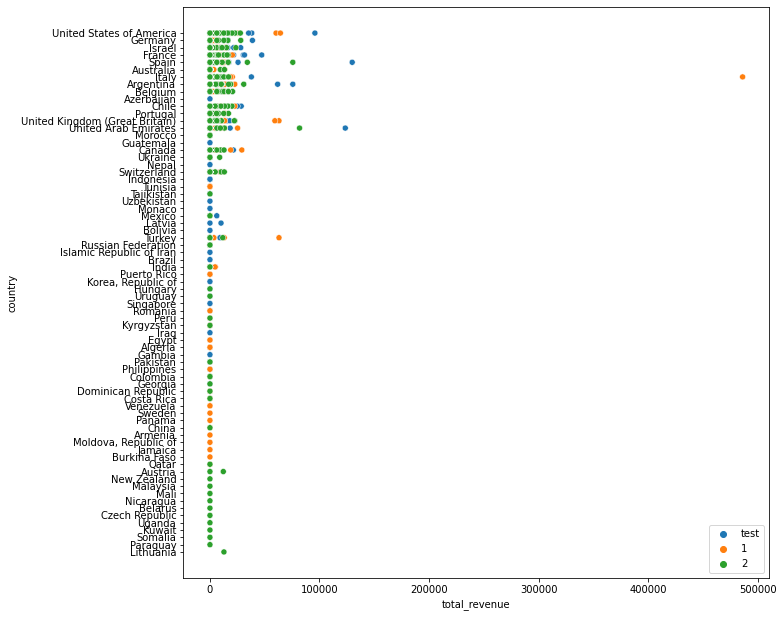

In [93]:
sns.scatterplot(y='country', x='total_revenue', data=users, hue='group')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.legend(loc = "lower right")

#### Видим один выброс (?), посмотрим на юзера, общая выручка по которому ~ 500 000 у.е

In [89]:
#Видим, что этот юзер использует премиум и возможно, он не является выбросом, пока оставлю
users.query("total_revenue > 400000")

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,num_visit_days,group,num_visit_day
5735,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1.0,1.0,486330,8,1,8


In [97]:
#посмотрим на транакции данного юзера. Странно, он платил с разных payment_id, пришел с разных страниц
#Удалю этого пользователя
transactions.query('uid == 892333905')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
279,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610.0,19.0,gifts,coins,1
286,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type,1
301,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67.0,empty_admins,other_type,1
316,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type,1
320,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type,1
322,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783.0,67.0,menu,other_type,1
336,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525.0,19.0,menu,coins,1
349,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525.0,19.0,fans,coins,1
361,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type,1
399,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773.0,146.0,menu,coins,1


In [103]:
users.drop(users[users.total_revenue > 400000].index, inplace=True)
transactions.drop(transactions[transactions.uid == 892333905].index, inplace=True)

In [95]:
# Проверили, что выручка вся >= 0
users.query("total_revenue < 0")

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,num_visit_days,group,num_visit_day


In [110]:
transactions=transactions.drop_duplicates()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test
...,...,...,...,...,...,...,...,...,...
1603,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,2
1604,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium,2
1605,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins,2
1606,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium,2


In [114]:
users.total_revenue.sum()

6316193

In [120]:
#Видим несоответствия по выручке, так как в транакциях больше на 2 тысячи
transactions.revenue.sum()

6331923.0

In [115]:
users['purchase']=users.total_revenue.apply(lambda x: 0 if x==0 else 1)

In [118]:
#524 юзеров когда-либо покупали что-то, так как их общая выручка не равна 0, основная масса пользователей ничего не покупала
users.purchase.value_counts()

0    12387
1      524
Name: purchase, dtype: int64

In [142]:
transactions_revenue=transactions.groupby('uid', as_index=False).agg({'revenue':'sum'}).rename(columns={'revenue':'sum_revenue'})
transactions_revenue.sum_revenue.sum()

6331923.0

In [159]:
new=users.merge(transactions_revenue, on='uid', how='left').fillna(0)

In [160]:
new['difference']=new.sum_revenue-new.total_revenue

In [161]:
#Чтобы прийти к одинаковой выручке среди юзеров и транзакций, был добавлен столбец с разницей. 
#Все, что не равно 0 нас не интеерсует,поэтому удалим
outliners=new.loc[new['difference'] !=0]
outliners

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,num_visit_days,group,num_visit_day,purchase,sum_revenue,difference
406,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,28,test,28,1,86996.0,-8827.0
761,891508155,34,101,1.0,Latvia,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,20,32,226,1.0,1.0,10101,13,test,13,1,9165.0,-936.0
1736,892050108,51,239,6.0,Israel,"1,2,3,4,5,6,7,9",1,37,42,364,1.0,1.0,16380,8,test,8,1,15119.0,-1261.0
1900,892339626,37,684,0.0,United States of America,"1,2,3,4,5,9,10,11,12,14,15,16,17,18,19,20,21,2...",1,18,40,263,1.0,1.0,17758,25,test,25,1,17004.0,-754.0
2070,892275462,31,310,0.0,France,"1,2,3,4,5,9,13,15,16",1,36,68,58,1.0,1.0,14885,9,test,9,1,58968.0,44083.0
2630,892202526,21,491,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,2...",1,18,35,59,1.0,0.0,2691,26,test,26,1,1794.0,-897.0
4567,891367521,25,129,1.0,Italy,"1,2,3,5,6,7,8",1,16,99,62,1.0,0.0,20462,7,1,7,1,16081.0,-4381.0
4818,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,27,1,27,1,806.0,780.0
5635,891721851,27,411,10.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18",1,23,29,90,1.0,1.0,18174,18,1,18,1,17277.0,-897.0
6232,891452706,41,134,80.0,Italy,"1,2,3,6,8,11",1,38,44,82,1.0,1.0,18902,6,1,6,1,12597.0,-6305.0


In [162]:
new.drop(new[new.difference != 0].index, inplace=True)

In [163]:
#Отлично, теперь должно сойтись, так как выручка по юзерам сходится с их транзакциями
new.loc[new['difference'] !=0]

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,num_visit_days,group,num_visit_day,purchase,sum_revenue,difference


In [152]:
new.total_revenue.sum()

5954052

In [153]:
new.sum_revenue.sum()

5954052.0

In [171]:
#Удалим выявленных ранее пользователей, выручка по которым не сходится
users=users[~users['uid'].isin(outliners.uid)]
transactions=transactions[~transactions['uid'].isin(outliners.uid)]

In [177]:
print('Total revenue from transactions:', transactions.revenue.sum(),'Total revenue from users:', users.total_revenue.sum())

Total revenue from transactions: 5954052.0 Total revenue from users: 5954052


### 4. Удалили выбросы и почистили данные. Теперь можно перейти к  вычислению интересующих нас метрик: ARPU, ARPPU, CR 

#### 4.1 Вычисляем доход с каждого пользователя приложением = ARPU

In [179]:
users.groupby('group').agg({'total_revenue':'mean'})

,total_revenue
group,
1,448.031423
2,439.490960
test,498.182241


#### 4.1 Вычисляем доход с каждого платящего пользователя = ARPPU

In [181]:
users.loc[users['total_revenue']>0].groupby('group').agg({'total_revenue':'mean'})

,total_revenue
group,
1,10713.149171
2,10284.571429
test,15308.428571


#### 4.2 Вычисляем конверсию в покупку = CR

In [191]:
(users.loc[users['total_revenue']>0].groupby('group').agg({'uid':'nunique'})\
 /users.groupby('group').agg({'uid':'nunique'}))\
.mul(100).reset_index().rename(columns={'uid':'cr, %'})\
.round(2)

,group,"cr, %"
0,1,4.18
1,2,4.27
2,test,3.25


#### Итак, мы видим, что значительно увеличились доход с платящего пользователя и ARPU, однако, конверсия в покупку упала ~ на 1%

In [289]:
# Объединим юзеров и транзакции по ключам: uid, group, country
merged=pd.merge(users, transactions, how='right', on=['uid', 'group', 'country'])

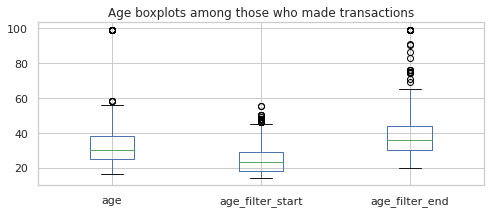

In [290]:
# Выбросы есть, но их не так много (в основном они в критерии по возрасту ДО, поэтому нам не важно, хоть до 99 лет)
ax = merged[['age', 'age_filter_start', 'age_filter_end']].plot(kind='box', title='Age boxplots among those who made transactions')

# Display the plot
plt.show()

In [264]:
merged.payment_id.value_counts()

147.0    411
19.0     218
146.0     87
67.0      84
68.0      40
0.0        4
Name: payment_id, dtype: int64

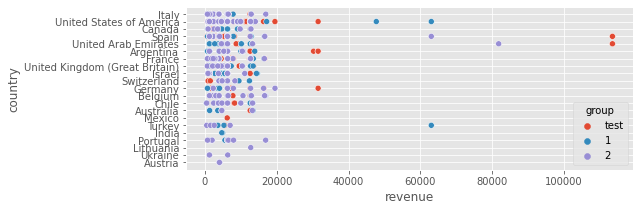

In [265]:
#Посмотрим на чек по странам
sns.scatterplot(y='country', x='revenue', data=merged, hue='group')

Видим, что самый большой чек в тестовой группе среди пользователей из Испании и Арабских Эмиратов. Посмотрим на них

In [266]:
merged.query('revenue > 100000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,num_visit_days,group,num_visit_day,purchase,joined_at,paid_at,revenue,payment_id,from_page,product_type
20,891178380.0,42.0,275.0,85.0,Spain,"1,2,4,5,6,7",1.0,26.0,36.0,287.0,...,6.0,test,6.0,1.0,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial
180,892038759.0,26.0,323.0,3.0,United Arab Emirates,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1.0,23.0,48.0,232.0,...,20.0,test,20.0,1.0,2017-10-22 11:12:00,2017-10-22 16:23:00,113477.0,147.0,autoreply_message,premium_no_trial


In [267]:
#В целом, выручка > 60000 только среди 7 пользователей
merged.query('revenue > 60000')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,num_visit_days,group,num_visit_day,purchase,joined_at,paid_at,revenue,payment_id,from_page,product_type
20,891178380.0,42.0,275.0,85.0,Spain,"1,2,4,5,6,7",1.0,26.0,36.0,287.0,...,6.0,test,6.0,1.0,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial
180,892038759.0,26.0,323.0,3.0,United Arab Emirates,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1.0,23.0,48.0,232.0,...,20.0,test,20.0,1.0,2017-10-22 11:12:00,2017-10-22 16:23:00,113477.0,147.0,autoreply_message,premium_no_trial
434,892216461.0,19.0,293.0,6.0,United States of America,"1,2,3,5,8,9,11,13,15,16,17,18,19,20,22,23,24,2...",1.0,16.0,25.0,58.0,...,19.0,1,19.0,1.0,2017-10-18 14:41:00,2017-10-18 15:02:00,63037.0,147.0,autoreply_message,premium_no_trial
505,891383310.0,22.0,1000.0,NaN,Turkey,1,1.0,19.0,83.0,4.0,...,1.0,1,1.0,1.0,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial
587,892307238.0,29.0,543.0,43.0,Spain,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1.0,16.0,36.0,46.0,...,28.0,2,28.0,1.0,2017-10-16 16:01:00,2017-10-16 20:41:00,63037.0,147.0,left_sidebar_menu,premium_no_trial
639,891778551.0,30.0,290.0,NaN,United Arab Emirates,"1,6,7,8,9,10",1.0,27.0,33.0,31.0,...,6.0,2,6.0,1.0,2017-10-27 21:26:00,2017-10-27 22:30:00,81796.0,147.0,left_sidebar_menu,premium_no_trial


#### Заключение: самый большой чек среди тех, у кого product_type = 'premium_no_trial' и с payment_id =147

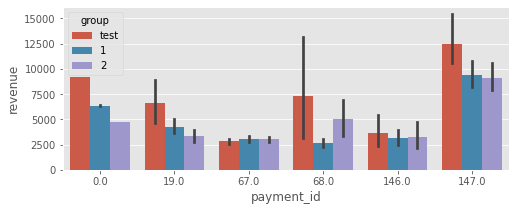

In [268]:
#sns.set_theme(style="darkgrid")
sns.barplot(x='payment_id',y='revenue', hue='group', data=merged)

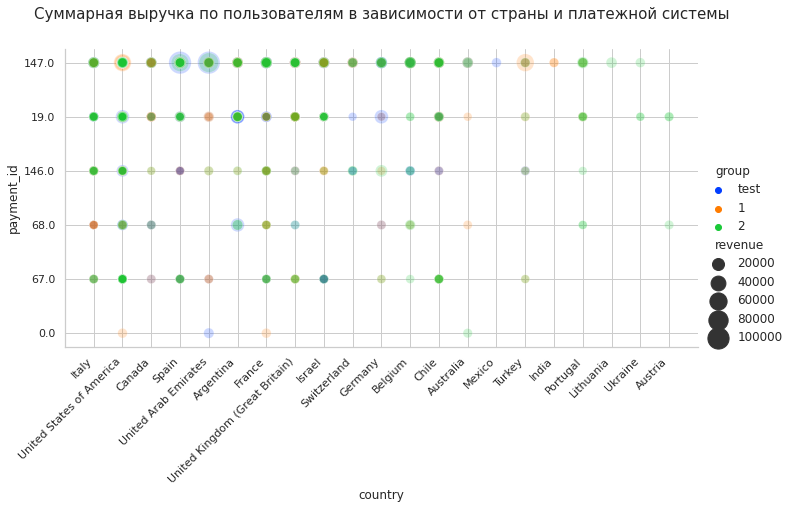

In [269]:
sns.set_theme(style="whitegrid")

sns.relplot(x="country", y=merged.payment_id.astype(str), hue="group", size="revenue",
            sizes=(70, 500), alpha=.2, palette="bright",
            height=5,aspect = 2, data=merged)
plt.title('Суммарная выручка по пользователям в зависимости от страны и платежной системы', fontsize=15, pad=30)

plt.xticks(rotation = 45, ha='right')

plt.show()

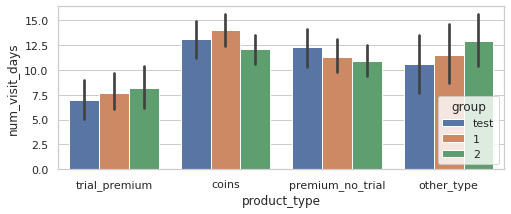

In [271]:
#Видим, что меньше всего посещений по дням у пользователей, у которых trial_premium
sns.barplot(y="num_visit_days",x='product_type', hue='group', data=merged)

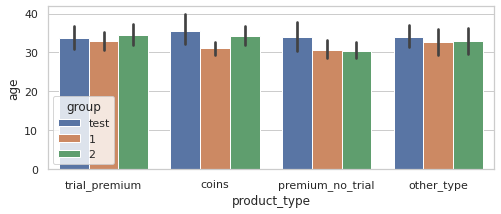

In [272]:
sns.barplot(y="age",x='product_type', hue='group', data=merged)

Так как у нас 2 контрольные группы, я проведу сначала A/A тест, чтобы убедиться в корректном сплитовании и что группы значимо не различаются

## 5. A/A test

In [209]:
# посчитаем суммарную выручку по юзерам для а/а теста
revenue_control_first =  merged.query('group==1').groupby('uid').agg({'revenue': 'sum'})
revenue_control_second =  merged.query('group==2').groupby('uid').agg({'revenue': 'sum'})
revenue_test      =  merged.query('group=="test"').groupby('uid').agg({'revenue': 'sum'})

(845, 23)

In [31]:
#Проверим типы
merged.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
joined_at            object
paid_at              object
revenue             float64
payment_id          float64
from_page            object
product_type         object
num_visit_days       object
group                object
dtype: object

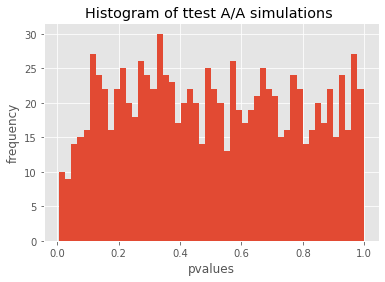

0.021

In [217]:
# А/А тест будет проводиться по суммарной выручке по юзерам
n = 1000
simulations = 1000
n_s = 40
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = revenue_control_first.revenue.sample(n_s, replace = False).values
    s2 = revenue_control_second.revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  Видим, что FPR < 0.05
  A/A тест сходится

### 5.1 Bootstrap

In [221]:
# bootstrap function
def get_bootstrap(
                  data_column_1, # числовые значения первой выборки
                  data_column_2, # числовые значения второй выборки
                  statistic, # интересующая нас статистика
                  draw=False, # нарисовать распределение
                  boot_it = 1000, # количество бутстрэп-подвыборок
                  bootstrap_conf_level = 0.95 # уровень значимости
                  ):
    
    boot_data = []
    
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1 \
                    .sample(len(data_column_1), replace = True) \
                    .values
        
        samples_2 = data_column_2 \
                    .sample(len(data_column_1), replace = True) \
                    .values
        
        # считаем разницу статистик между двумя подвыборками и сохраняем в список
        boot_data.append(statistic(samples_1)-statistic(samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = ss.norm.cdf(x = 0, 
                         loc = np.mean(boot_data), 
                         scale = np.std(boot_data))
    
    p_2 = ss.norm.cdf(x = 0, 
                         loc = -np.mean(boot_data), 
                         scale = np.std(boot_data))
    
    p_value = min(p_1, p_2) * 2

    # Визуализация
    if draw:
        _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
        for bar in bars:
            if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
                bar.set_facecolor('red')
            else: 
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('ggplot')
        plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
    
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

### 5.1.1 Bootstrap по ARPU

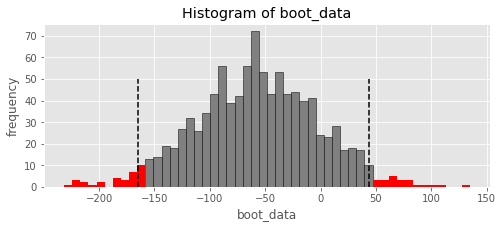

In [255]:
bootstrap_arpu=get_bootstrap(users.loc[(users['group'] == 1) | (users['group'] == 2)].total_revenue,users.loc[users['group']=='test'].total_revenue, statistic=np.mean, draw=True)

In [244]:
print('BOOTSTRAP по ARPU:',bootstrap_arpu['p_value'])

BOOTSTRAP по ARPU: 0.3288685824003057


### ВЫВОД по ARPU
0 принадлежит 95% доверительному интервалу и p-value > 0.05 

=> не отвергаем H0 об отсутсвии статистически значимого различия ARPU между тестовой и контрольной группами.

### 5.1.2 Boostrap по ARPPU

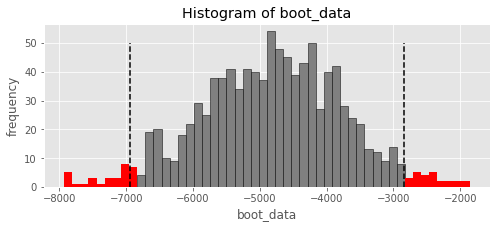

In [251]:
bootstrap_arppu=get_bootstrap(users.loc[(users['group'] != "test" )&  (users['total_revenue']> 0)].total_revenue,users.loc[(users['group']=='test') & (users['total_revenue']> 0)].total_revenue, statistic=np.mean, draw=True)

In [249]:
bootstrap_arppu['p_value']

5.116240738572684e-16

### ВЫВОД по ARPPU
0 НЕ принадлежит 95% доверительному интервалу и p-value < 0.05

=> Отвергаем H0, принимаем альтернативную гипотезу о том, что выявлены статистически значимые различия ARPPU между тестовой и контрольной группами

In [296]:
#Добавим столбец CR, который будет вычисляться по наличию премиума у юзера
users['cr']=users['is_premium'].apply(lambda x: 1 if x == 1 else 0)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


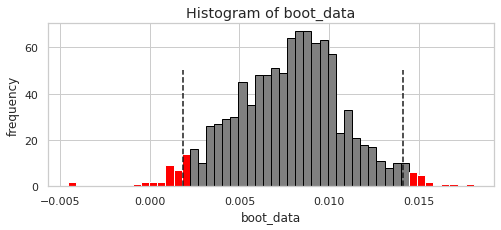

In [298]:
bootstrap_cr=get_bootstrap(users.loc[(users['group'] != "test" )].cr,users.loc[(users['group']=='test')].cr, statistic=np.mean, draw=True)

In [300]:
bootstrap_cr['p_value']

0.010856557916597237

### ВЫВОД по CR
0 НЕ принадлежит 95% доверительному интервалу и p-value < 0.05

=> Отвергаем H0, принимаем альтернативную гипотезу о том, что выявлены статистически значимые различия CR между тестовой и контрольной группами

### 5.2 ОБЩИЙ ВЫВОД по А/А/B тесту
1. Система сплитования сработала корректно
2. Выявлены статистически значимые различия по следующим метрикам: ARPPU, CR.
Несмотря на увеличение дохода с платящего пользователя, упала конверсия в покупку, что довольно плохо, учитывая, что у нас не так много пользователей, использующих премиум 

### 6. Проверим фактор возраста, изменилась ли конверсия среди отдельных групп

#### 6.1 AGE

In [333]:
#Разобъем пользователей по возрастным группам
users['age_group']=pd.cut(users.age, bins=[18, 25, 30, 40, 50, 80],  
                             labels=['< 24', '25-30', '31-40', '41-50', '51 <'])

age_group=users.query('total_revenue>0')\
            .groupby(['age_group', 'group'])\
            .agg({'total_revenue':'mean'}).reset_index()\
            .rename(columns={'total_revenue':'arppu'})

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [334]:
age_group

,age_group,group,arppu
0,< 24,1,11848.537037
1,< 24,2,7720.617021
2,< 24,test,13470.757576
3,25-30,1,10281.916667
4,25-30,2,11603.041667
5,25-30,test,16949.833333
6,31-40,1,9979.976190
7,31-40,2,11129.477273
8,31-40,test,14528.222222
9,41-50,1,11999.000000


In [335]:
df_24 = users.query('age<24')[['uid', 'group', 'cr']]
stat_24, p_24, dof, expected = chi2_contingency(pd.crosstab(df_24.cr, df_24.group))
print(stat_24, p_24)
if p_24 <= 0.05:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

2.084566358595197 0.3526486021088737
Не отклоняем H0


In [331]:
df_29 = users.query('25<age<30')[['uid', 'group', 'cr']]
stat_29, p_29, dof, expected = chi2_contingency(pd.crosstab(df_29.cr, df_29.group))
print(stat_29, p_29)
if p_29 <= 0.05:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

7.9358495971295415 0.018912639977658945
Отклоняем H0


In [336]:
df_39 = users.query('31<age<40')[['uid', 'group', 'cr']]
stat_39, p_39, dof, expected = chi2_contingency(pd.crosstab(df_39.cr, df_39.group))
print(stat_39, p_39)
if p_39 <= 0.05:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

8.877145458839921 0.011812786536243798
Отклоняем H0


In [337]:
df_49 = users.query('41<age<50')[['uid', 'group', 'cr']]
stat_49, p_49, dof, expected = chi2_contingency(pd.crosstab(df_49.cr, df_49.group))
print(stat_49, p_49)
if p_49 <= 0.05:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

4.108826455232583 0.12816801897161237
Не отклоняем H0


In [339]:
df_51 = users.query('51<age')[['uid', 'group', 'cr']]
stat_51, p_51, dof, expected = chi2_contingency(pd.crosstab(df_51.cr, df_51.group))
print(stat_51, p_51)
if p_51 <= 0.05:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

3.221117609692719 0.19977594711059832
Не отклоняем H0


#### Вывод: конверсия изменилась значимо для возрастных групп: 25-30, 31-49 лет

In [351]:
premium_no_trial=merged.query("product_type == 'premium_no_trial'")

In [361]:
premium_no_trial.query('25<age<49').shape[0]/premium_no_trial.shape[0]

0.5970695970695971

Мы видим, что эта возрастная группа очень значима, она занимает ~60% всех платящих пользователей

## 7. Выводы
1. Были проанализированы, вычищены данные
2. В среднем, юзеры проводят в приложении <5 дней в месяц
3. Самый большой чек среди тех, у кого product_type = 'premium_no_trial' и с payment_id =147
4. Значительно увеличились доход с платящего пользователя и ARPU, однако, конверсия в покупку упала ~ на 1%
5. Система сплитования сработала корректно
6. Выявлены статистически значимые различия по следующим метрикам: ARPPU, CR. Несмотря на увеличение дохода с платящего пользователя, упала конверсия в покупку, что довольно плохо, учитывая, что у нас не так много пользователей, использующих премиум.
7. Конверсия изменилась значимо для возрастных групп: 25-30, 31-49 лет, которые составляют около 60% всех платящих пользователей. 
8. Бизнесу стоит задуматься об успешности эксперимента, так как конверсия очень серьезный показатель, хоть и сильно положительно увеличился доход с платящих пользователей.